In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples = 1_000, factor = 0.3, noise = 0.05, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0 )

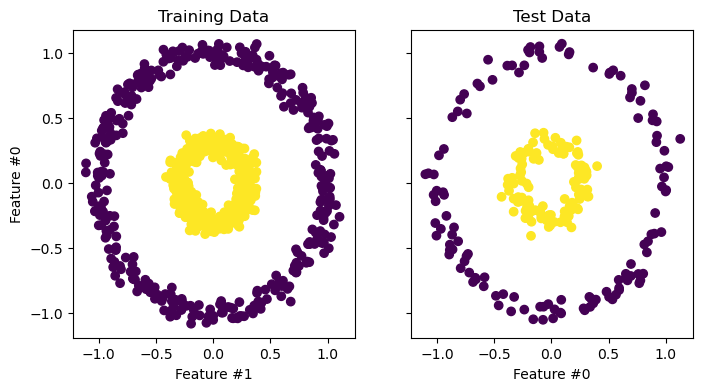

In [12]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

# Plot training data
train_ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
train_ax.set_xlabel('Feature #1')
train_ax.set_ylabel('Feature #0')
train_ax.set_title('Training Data')

# Plot test data
test_ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
test_ax.set_xlabel('Feature #0')
_ = test_ax.set_title('Test Data')

# Show the plot
plt.show()

In [13]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components = 2)
kernel_pca = KernelPCA(
    n_components = None, kernel = 'rbf', gamma = 10, fit_inverse_transform = True, alpha = 0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

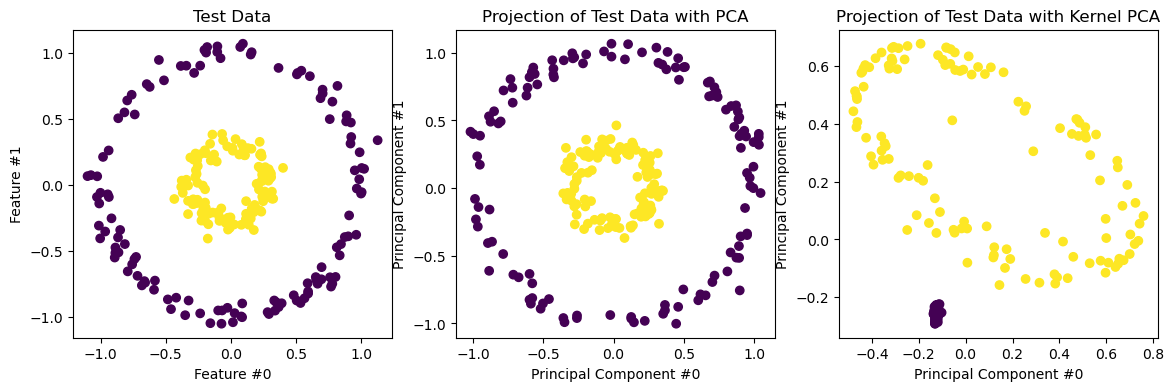

In [14]:
# Create subplots with shared x and y axes
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(ncols=3, figsize=(14, 4))

# Plot original test data
orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_xlabel('Feature #0')
orig_data_ax.set_ylabel('Feature #1')
orig_data_ax.set_title('Test Data')

# Plot PCA projection of test data
pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_xlabel('Principal Component #0')
pca_proj_ax.set_ylabel('Principal Component #1')
pca_proj_ax.set_title('Projection of Test Data with PCA')

# Plot Kernel PCA projection of test data
kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_xlabel('Principal Component #0')
kernel_pca_proj_ax.set_ylabel('Principal Component #1')
kernel_pca_proj_ax.set_title('Projection of Test Data with Kernel PCA')

# Show the plot
plt.show()

In [17]:
# reconstruction 
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

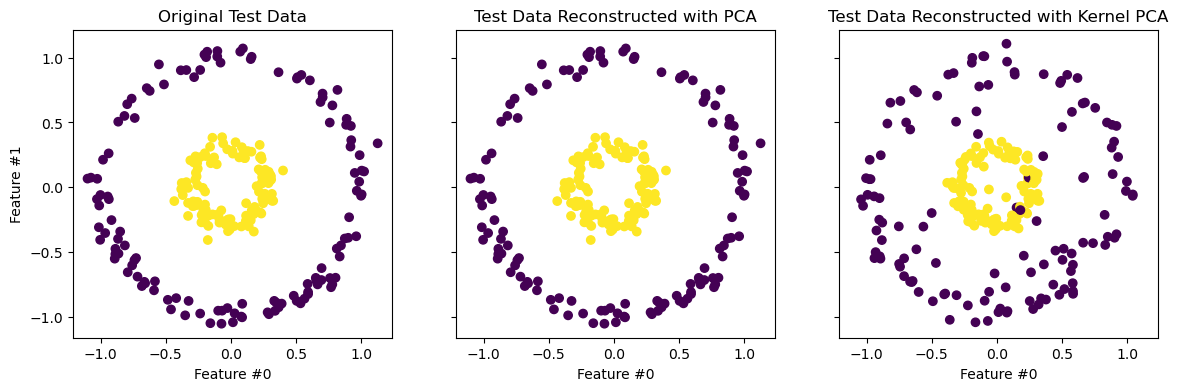

In [18]:
# Create subplots with shared x and y axes
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(14, 4))

# Plot original test data
orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_xlabel('Feature #0')
orig_data_ax.set_ylabel('Feature #1')
orig_data_ax.set_title('Original Test Data')

# Plot PCA reconstructed test data
pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=y_test)
pca_back_proj_ax.set_xlabel('Feature #0')
pca_back_proj_ax.set_title('Test Data Reconstructed with PCA')

# Plot Kernel PCA reconstructed test data
kernel_pca_back_proj_ax.scatter(X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test)
kernel_pca_back_proj_ax.set_xlabel('Feature #0')
kernel_pca_back_proj_ax.set_title('Test Data Reconstructed with Kernel PCA')

# Show the plot
plt.show()